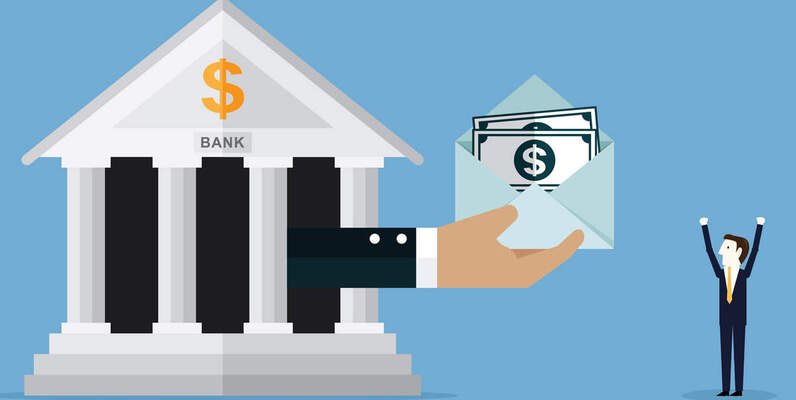

***The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.***

In [ ]:
#Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_text


In [ ]:
def wrangle(data_path):
    df = pd.read_csv(data_path)

    # Displaying the initial observations
    print("Initial Observations:")
    print(df.head())
    print()

    # Conducting an examination of data types and missing values
    print("Info about data:")
    print(df.info(show_counts=True))
    print()

    # Check for duplicated rows
    print("Number of duplicated rows:", df.duplicated().sum())
    print()

    # Descriptive statistics
    print("Descriptive Statistics:")
    print(df.describe().transpose())
    print()

    #print shape of data
    print(df.shape)

    print()
    # Columns with null values
    print("Columns with null values:")
    columns_with_null = df.columns[df.isnull().any()].tolist()
    print(columns_with_null)
    print()

    # forward fill the null values in columns
    df.ffill(inplace=True)
    print()

    #to check is null again
    print(df.isnull().sum())

    return df

# Example usage
data_path = "bank.csv"
data = wrangle(data_path)


Initial Observations:
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  

Info about data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 ent

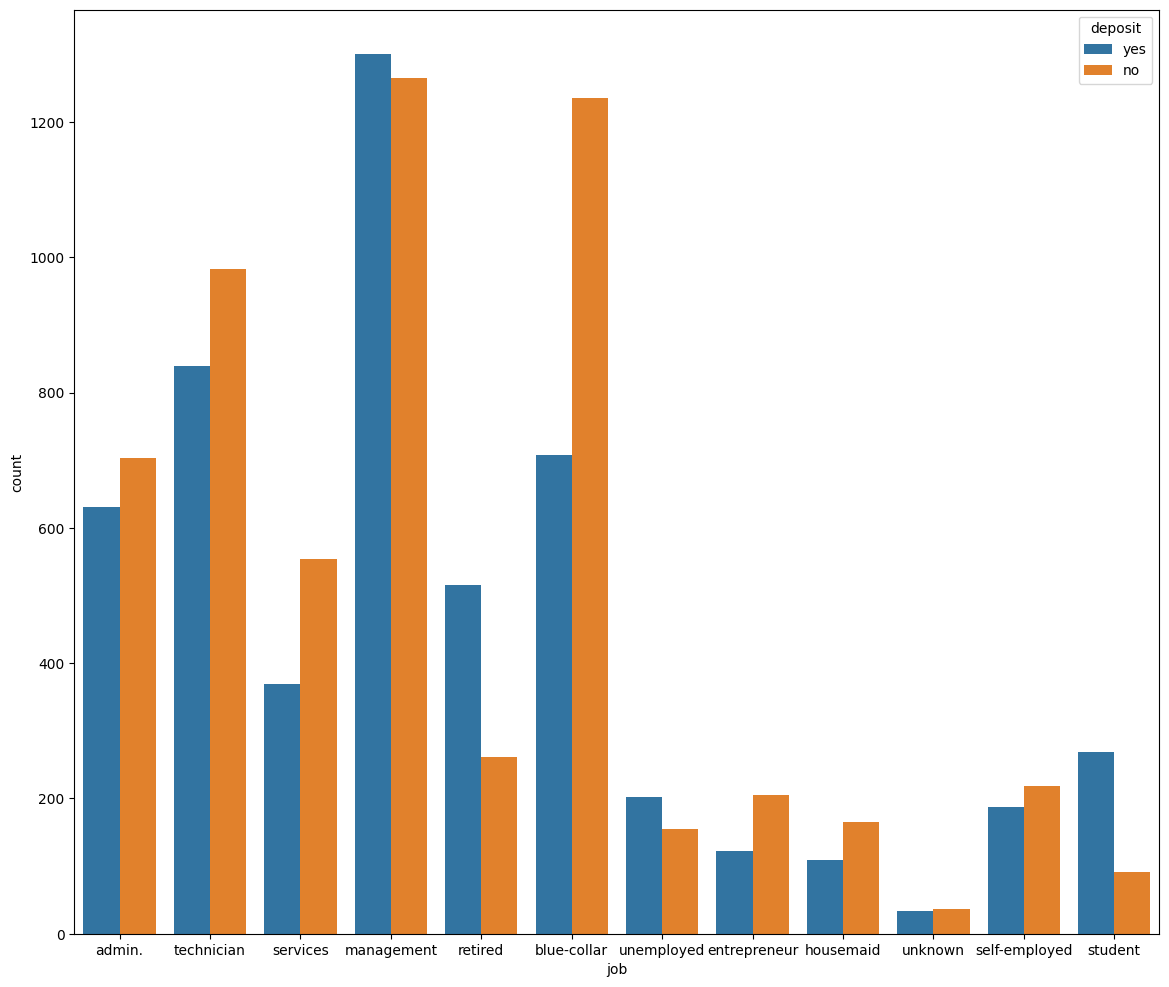

In [ ]:
plt.figure(figsize = (14,12))
total = len(data["job"])
ax = sns.countplot(x = 'job', data = data, hue = 'deposit')

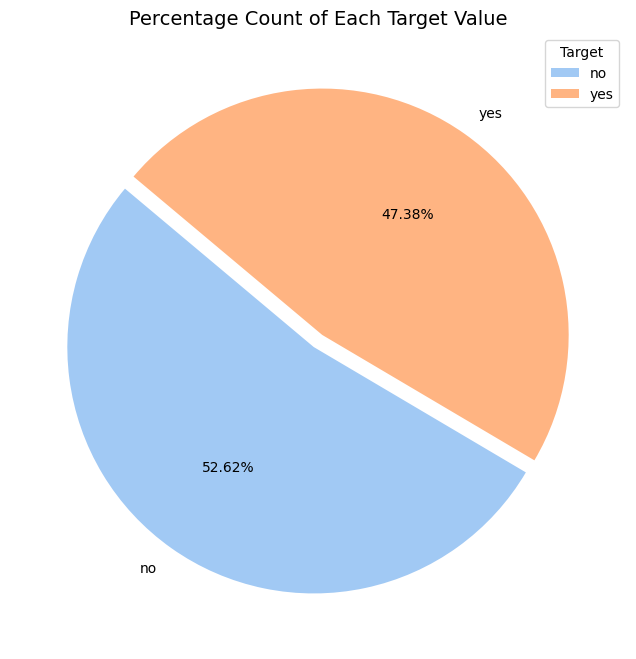

In [ ]:

# Create a pie chart with value counts of the 'target' column
def plot_target_distribution(data):
    # Value counts of 'target' column
    target_counts = data['deposit'].value_counts()
    # Define color palette
    colors = sns.color_palette("pastel")
    # Explode the largest segment for better visibility
    explode = [0 if i == target_counts.idxmax() else 0.03 for i in range(len(target_counts))]
    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(target_counts, labels=target_counts.index, autopct='%.2f%%', colors=colors, startangle=140,explode=explode)
    plt.title("Percentage Count of Each Target Value", fontsize=14)

    # Add legend
    plt.legend(title="Target", labels=target_counts.index, loc="best")

    # Display the plot
    plt.show()

# Plot the target distribution
plot_target_distribution(data)


<ipython-input-62-a7e51c607c42>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=target_count,x='deposit',y='count',palette="rainbow")


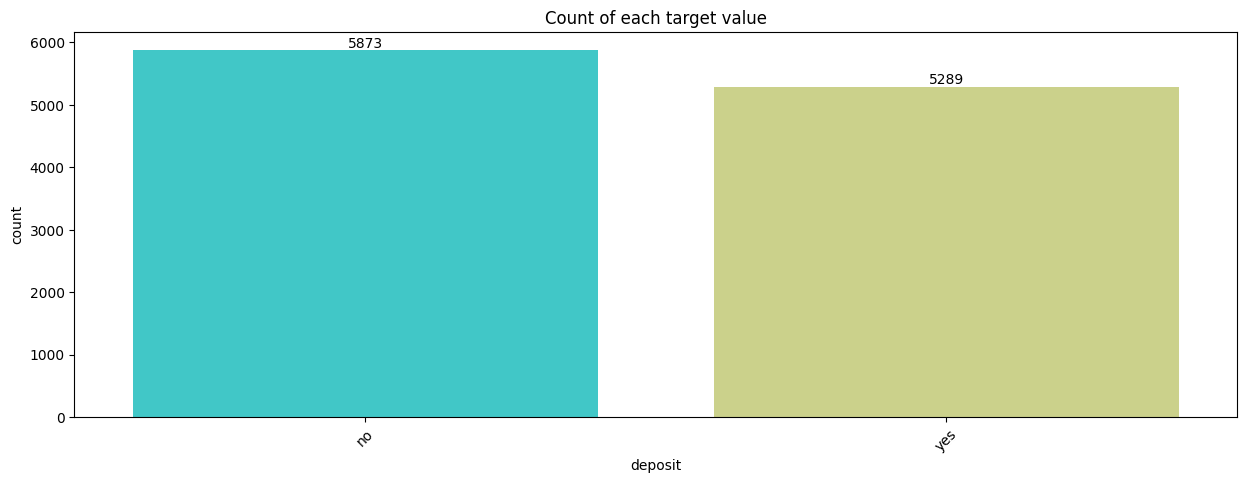

In [ ]:
target_count = data['deposit'].value_counts().reset_index()
target_count
plt.figure(figsize=(15,5))
ax = sns.barplot(data=target_count,x='deposit',y='count',palette="rainbow")
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Count of each target value")
plt.xticks(rotation=45)

plt.show()

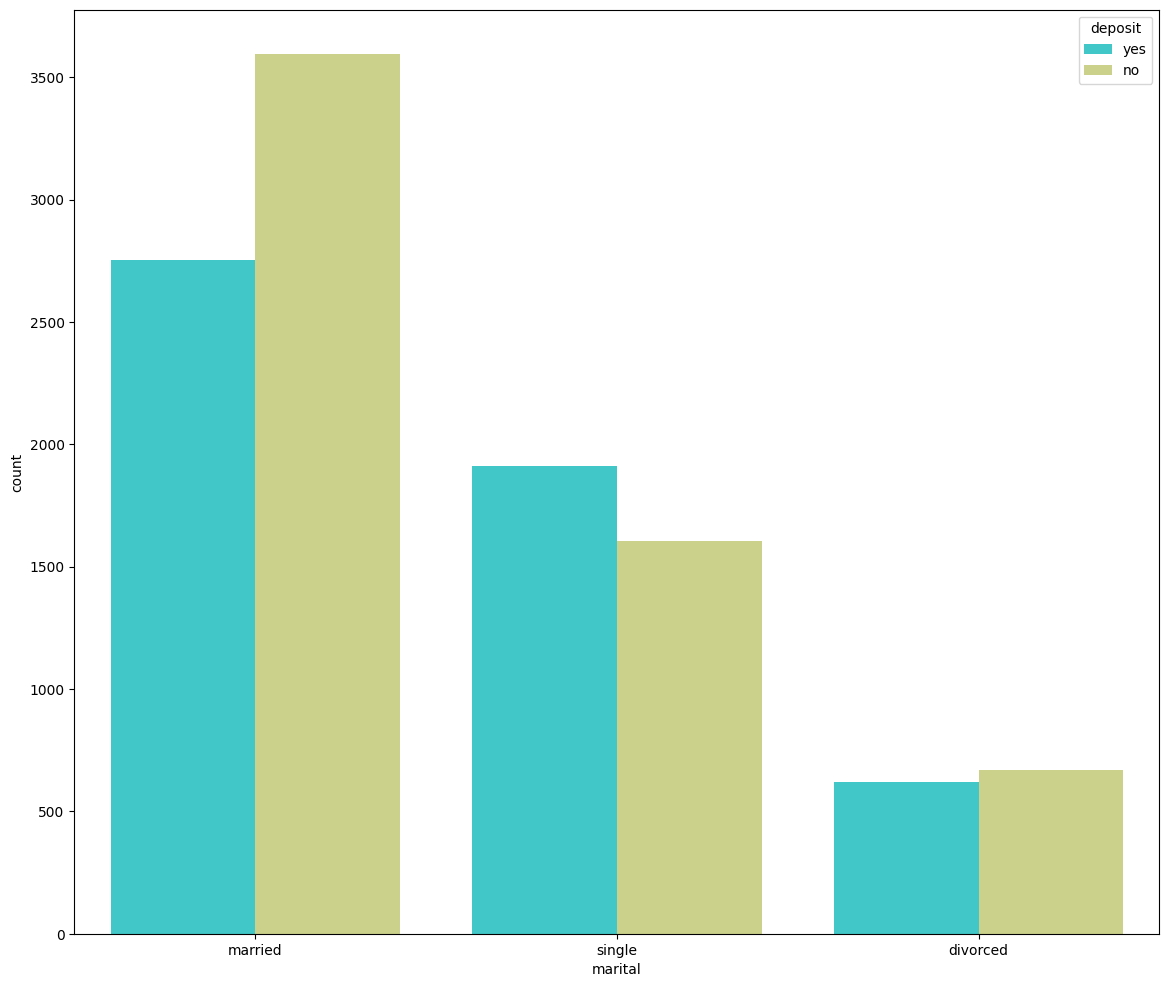

In [ ]:
plt.figure(figsize = (14,12))
total = len(data["marital"])
ax = sns.countplot(x = 'marital', data = data, hue = 'deposit', palette = 'rainbow')

In [ ]:
cat_cols = data.select_dtypes(include = 'object').columns
print (cat_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')


<ipython-input-65-bb29c6f2c7fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = feature, data = data, palette = 'viridis')
<ipython-input-65-bb29c6f2c7fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = feature, data = data, palette = 'viridis')
<ipython-input-65-bb29c6f2c7fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = feature, data = data, palette = 'viridis')
<ipython-input-65-bb29c6f2c7fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

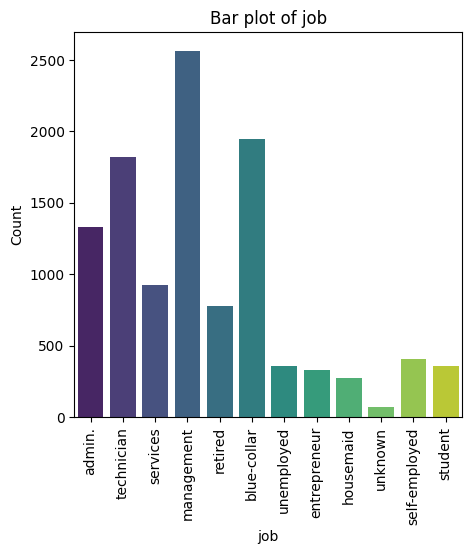

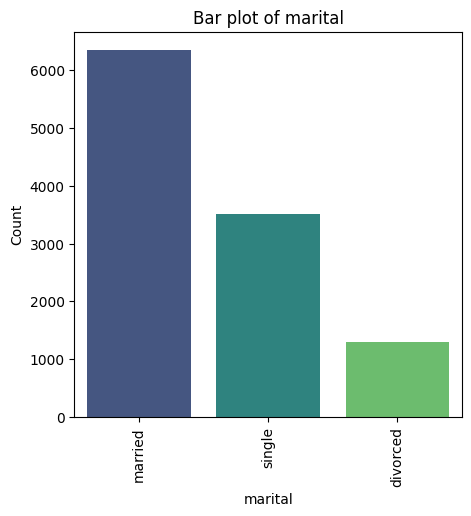

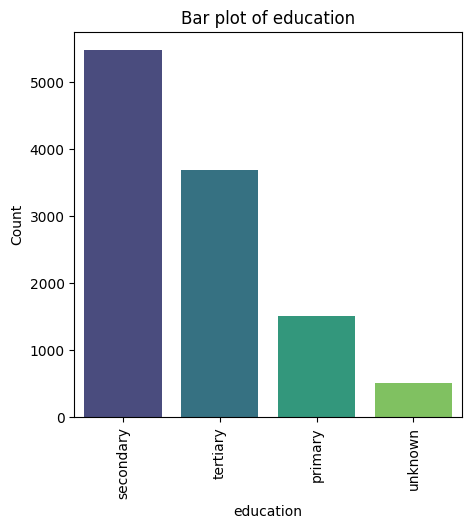

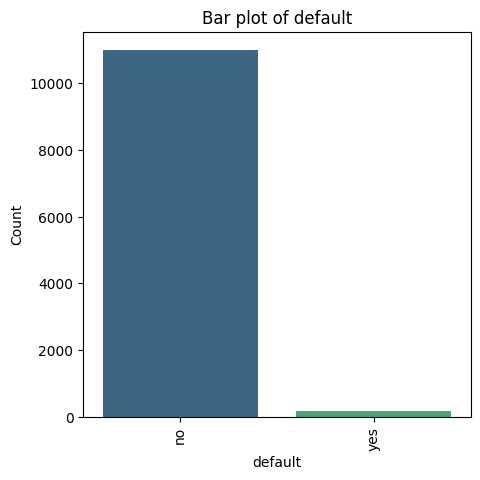

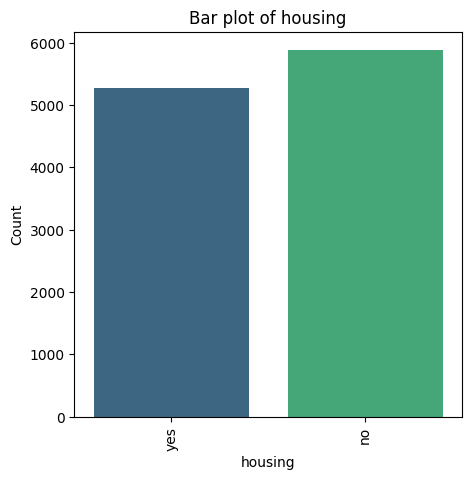

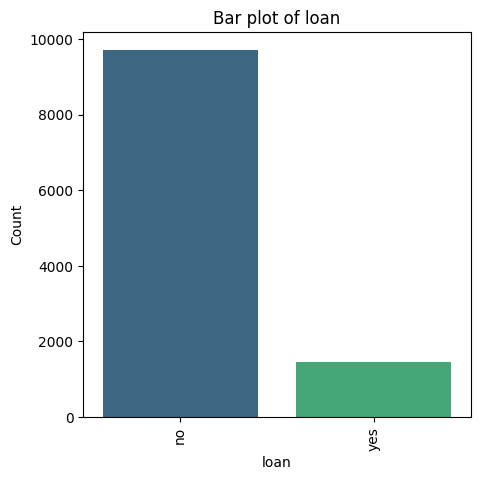

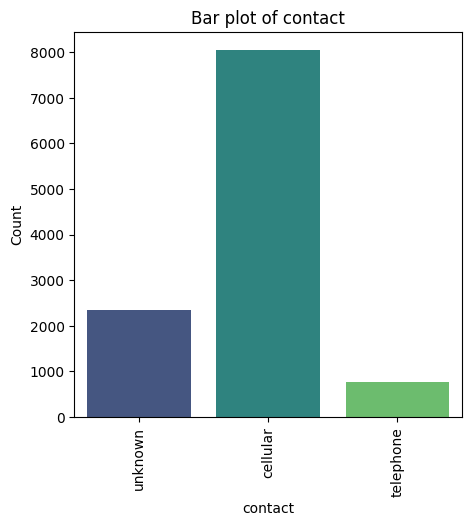

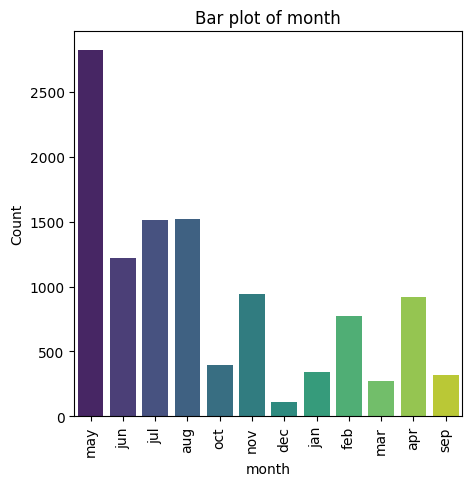

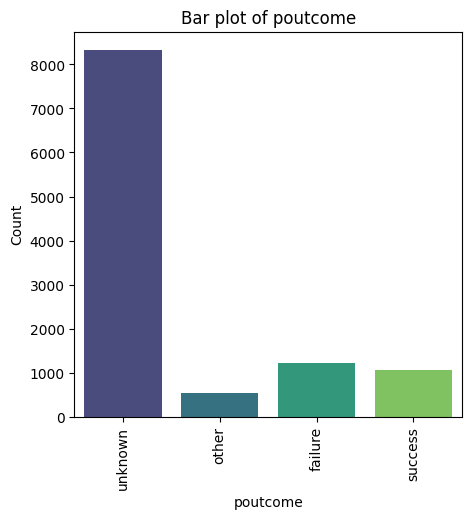

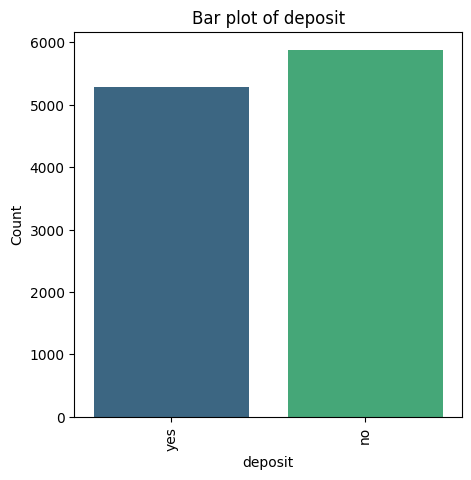

In [ ]:
for feature in cat_cols:
  plt.figure(figsize = (5,5))
  sns.countplot(x = feature, data = data, palette = 'viridis')
  plt.title(f'Bar plot of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.xticks(rotation = 90)
  plt.show

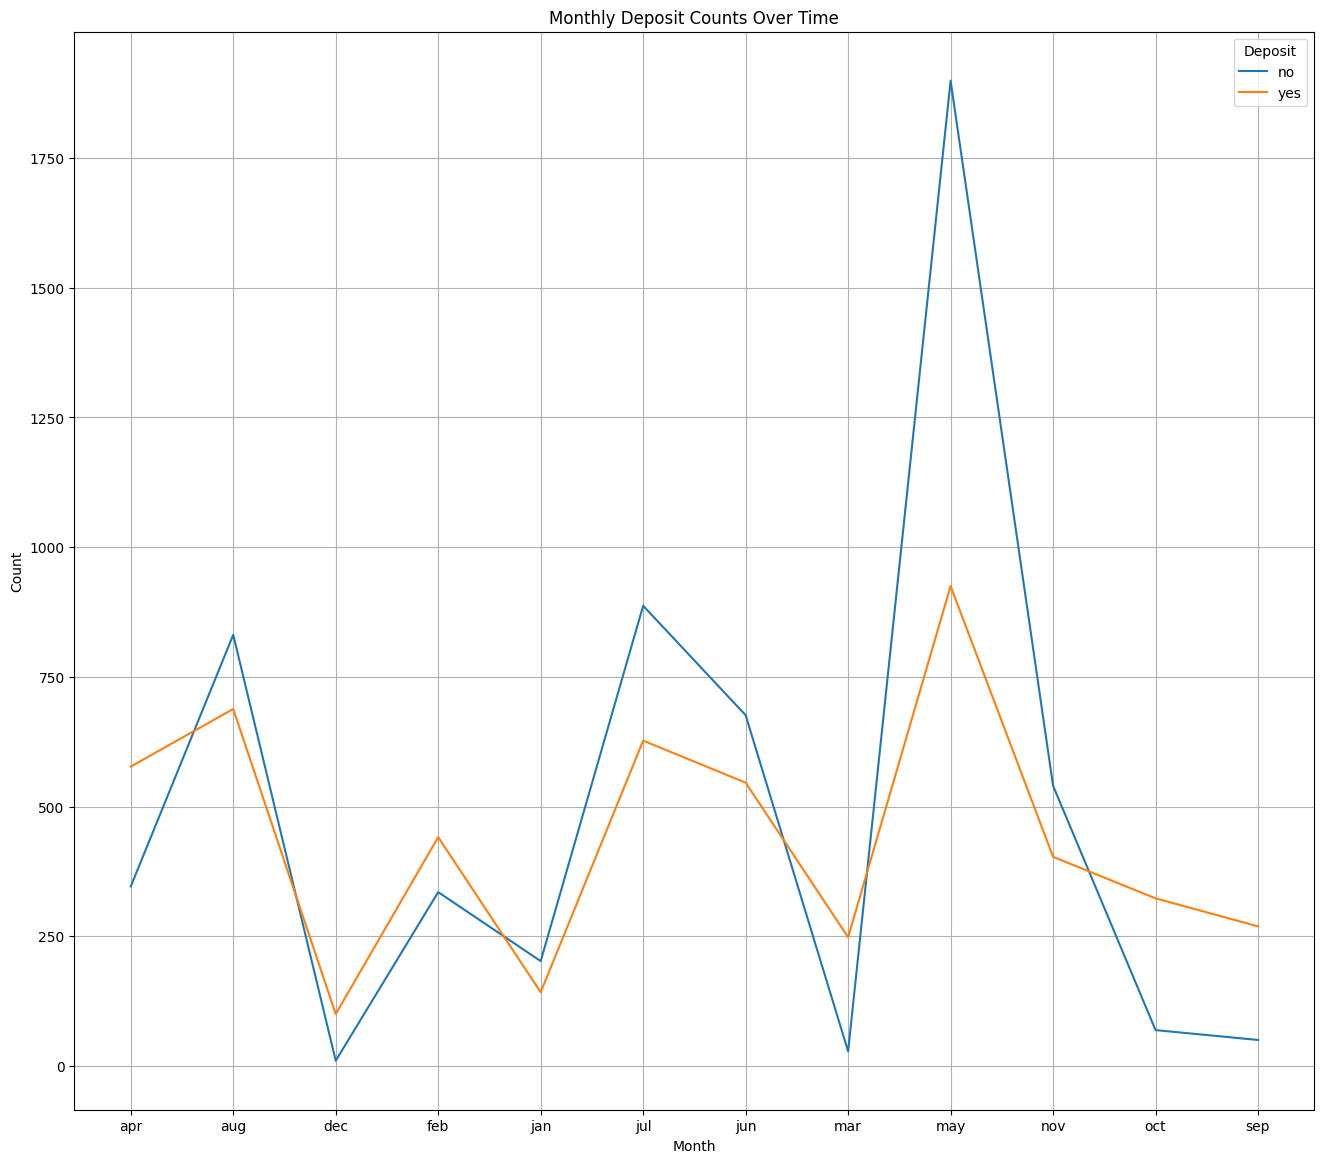

In [ ]:
# Group by 'month' and 'deposit', then count occurrences
grouped_data = data.groupby(['month', 'deposit']).size().unstack(fill_value=0)

# Plotting the line chart
plt.figure(figsize=(16, 14))

# Plot each 'deposit' category as a separate line
for deposit_type in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[deposit_type], label=deposit_type)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Deposit Counts Over Time')
plt.legend(title='Deposit')
plt.grid(True)

# Display the plot
plt.show()

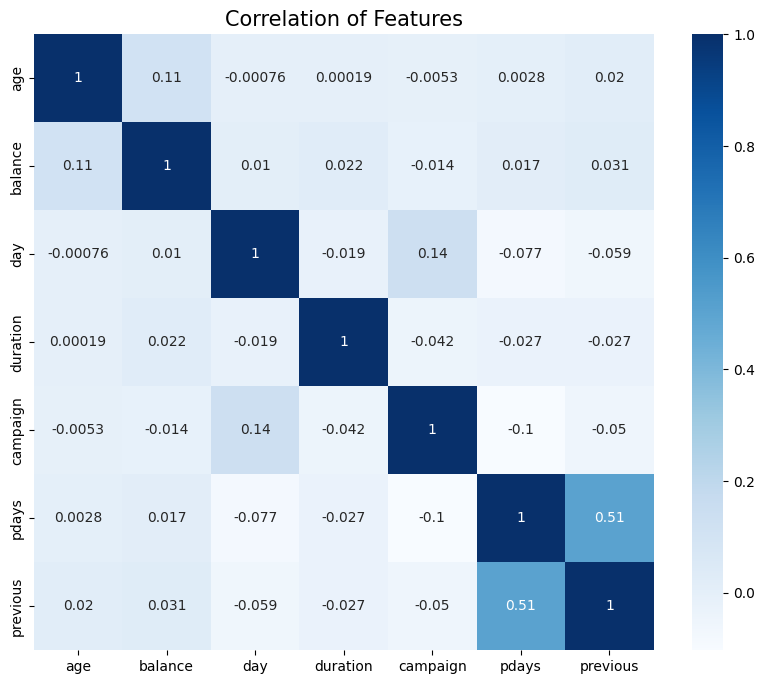

In [ ]:
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the Pearson correlation matrix
corr = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="Blues")

# Adding the title
plt.title("Correlation of Features", size=15)

# Display the plot
plt.show()

# **Model Build**

In [ ]:
# Define the feature columns and target column
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
target = ['deposit']
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)

In [ ]:
# Split the data into training and testing sets
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
7968,57,950,9,1272,1,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1456,34,925,13,709,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
361,41,75,1,479,9,-1,0,True,False,False,...,True,False,False,False,False,False,False,False,False,True
812,46,4414,18,504,7,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1092,28,4465,28,769,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,47,761,11,80,2,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
5191,28,159,16,449,2,33,4,False,False,False,...,False,False,False,False,True,False,False,False,True,False
5390,35,1144,20,197,13,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
860,51,746,25,372,5,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=10, min_samples_leaf=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=10,
                       random_state=0)

In [ ]:
# Make Predictions
y_pred = clf.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7805315019408778


Classification Report:
               precision    recall  f1-score   support

          no       0.81      0.76      0.78      1742
         yes       0.76      0.80      0.78      1607

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



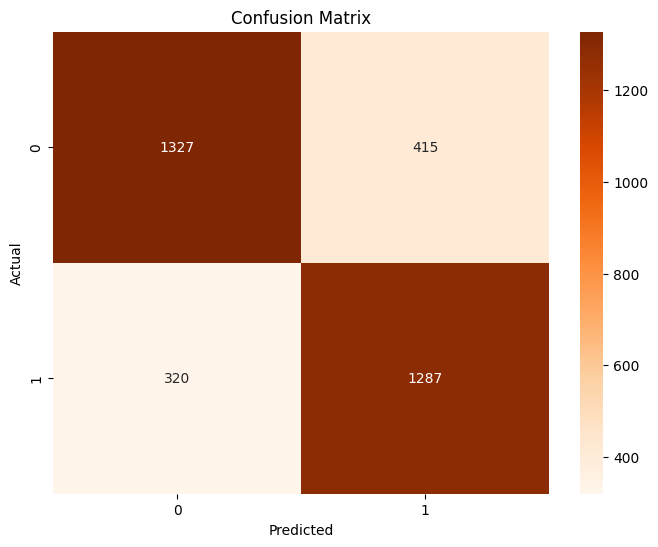

In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Oranges")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

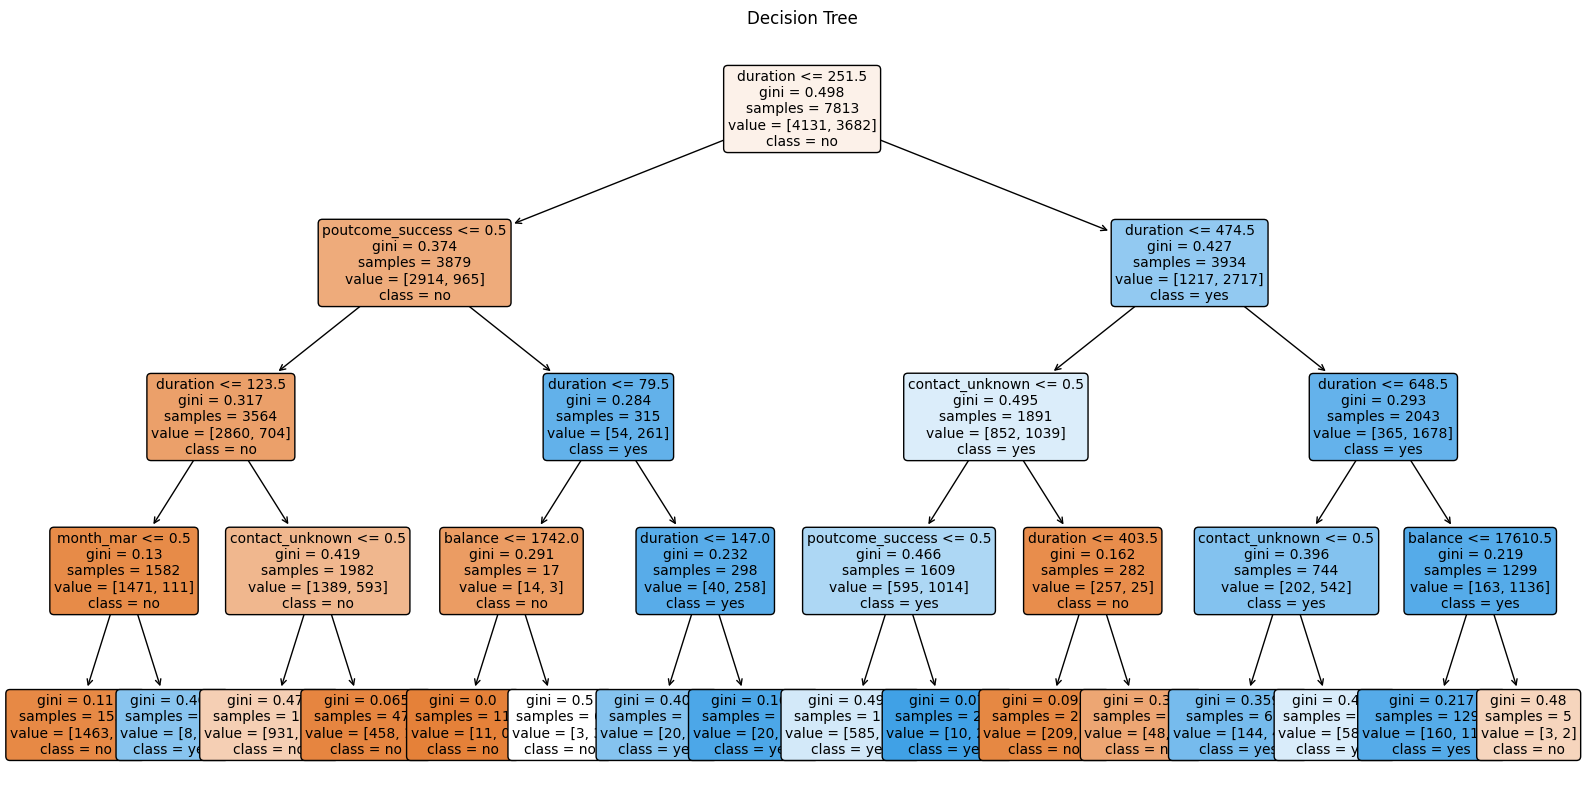

In [ ]:
# Visualizing the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=['no', 'yes'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree")
plt.show()

# Save the plot to a file for better visualization
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=['no', 'yes'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree")
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')
plt.close()